In [1]:
import sys, ast, os
import time
import pickle
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
#from plotnine import *
import matplotlib.pyplot as plt 
import matplotlib
data_type = 'float32'
import matplotlib as mpl
#os.environ["THEANO_FLAGS"] = 'device=cuda0,floatX=' + data_type + ',force_device=True'
# /nfs/team283/vk7/software/miniconda3farm5/envs/cellpymc/bin/pip install git+https://github.com/vitkl/cell2location.git
#sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/cell2location/')
#sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/cell2location_dev/')
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/scvi-tools/')

#import cell2location
import scvi
#import pycell2location.models as c2l

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
from matplotlib import rcParams
import seaborn as sns

# scanpy prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read a previously trained LocationModel
results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/lymph_nodes_analysis/'
sp_results_folder = f'{results_folder}'
sc_results_folder = f'{results_folder}regression_model/'

scvi_run_name = 'signatures_lr0002_Adam_long_v0ref_30kiter_c2l'
scvi_ref_run_name = 'signatures_lr0002_Adam_ref'
scvi_run_path = f'{results_folder}pyro_model/{scvi_run_name}/'
scvi_ref_run_path = f'{results_folder}pyro_model/{scvi_ref_run_name}/'

# path for saving figures
fig_path = f'{scvi_run_path}plots/figures/'
sc_figpath = sc.settings.figdir
sc.settings.figdir = f'{fig_path}'

adata_vis = sc.read_h5ad(f'{scvi_run_path}sp.h5ad')

# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

adata_vis.obs['sample'] = list(adata_vis.uns['spatial'].keys())[0]

ln_regression = adata_vis

In [3]:
# read a previously trained 
c2l_results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_visium_snrna/'
results_folder_allen = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_brain_allen/'
sp_results_folder = f'{c2l_results_folder}scvi/'
sc_results_folder = f'{c2l_results_folder}regression_model/'

run_name = 'v3_lr0002_Adam_signatures_c2l_Cell2location_5experiments_59clusters_14968locations_12809genes_Nonebatch_size_amortisedFalse_20000max_epochs_200alphatest'

sp_data_file = f'{sp_results_folder}{run_name}/sp.h5ad'
adata_vis = anndata.read(sp_data_file)

# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

slide = adata_vis[adata_vis.obs["sample"]==adata_vis.obs["sample"].unique()[0]]

brain_regression = slide

In [4]:
# read a previously trained LocationModel
results_folder = '/nfs/team205/vk7/sanger_projects/BayraktarLab/scvi-tools/scvi/external/cell2location/tutorial/results/lymph_nodes_analysis/non_amortised/'
sp_results_folder = f'{results_folder}'

scvi_run_name = 'signatures_lr0002_Adam_long_hardcodedref_30kiter_c2l'
scvi_run_path = f'{results_folder}{scvi_run_name}/'

adata_vis = sc.read_h5ad(f'{scvi_run_path}sp.h5ad')

# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

adata_vis.obs['sample'] = list(adata_vis.uns['spatial'].keys())[0]

ln_hardcoded = adata_vis

In [5]:
# read a previously trained 
c2l_results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_visium_snrna/'
results_folder_allen = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_brain_allen/'
sp_results_folder = f'{c2l_results_folder}scvi/'
sc_results_folder = f'{c2l_results_folder}regression_model/'

run_name = 'v3_lr0002_Adam_signatures_hard_coded_c2l_Cell2location_5experiments_59clusters_14968locations_12809genes_200alphatest'

sp_data_file = f'{sp_results_folder}{run_name}/sp.h5ad'
adata_vis = anndata.read(sp_data_file)

# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

slide = adata_vis[adata_vis.obs["sample"]==adata_vis.obs["sample"].unique()[0]]

brain_hardcoded = slide

Text(0.5, 1.0, 'lymph node, r=0.960')

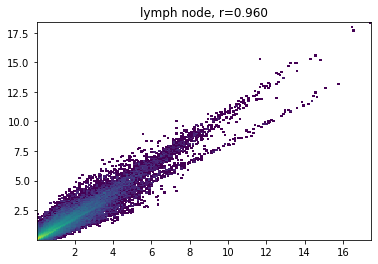

In [6]:
from matplotlib.colors import LogNorm


plt.hist2d(ln_hardcoded.obs[ln_hardcoded.uns['mod']['factor_names']].values.flatten(), ln_regression.obs[ln_hardcoded.uns['mod']['factor_names']].values.flatten(), bins=200, cmin=1, norm=LogNorm());
# plt.xlim(0, 5)
plt.title('lymph node, r=0.960')
# plt.ylim(0, 5)

Text(0.5, 1.0, 'mouse brain, r=0.965')

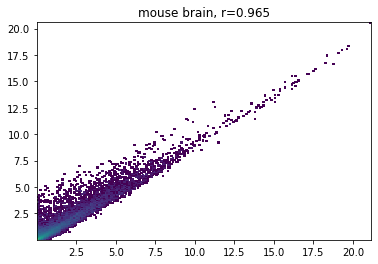

In [7]:
from matplotlib.colors import LogNorm


plt.hist2d(brain_hardcoded.obs[brain_hardcoded.uns['mod']['factor_names']].values.flatten(), brain_regression.obs[brain_hardcoded.uns['mod']['factor_names']].values.flatten(), bins=200, cmin=1, norm=LogNorm());
plt.title('mouse brain, r=0.965')
# plt.xlim(0, 5)
# plt.ylim(0, 5)

In [8]:
np.corrcoef(ln_hardcoded.obs[ln_hardcoded.uns['mod']['factor_names']].values.flatten(), ln_regression.obs[ln_hardcoded.uns['mod']['factor_names']].values.flatten())

array([[1.        , 0.96013955],
       [0.96013955, 1.        ]])

In [9]:
np.corrcoef(brain_hardcoded.obs[brain_hardcoded.uns['mod']['factor_names']].values.flatten(), brain_regression.obs[brain_hardcoded.uns['mod']['factor_names']].values.flatten())

array([[1.        , 0.96544565],
       [0.96544565, 1.        ]])

In [10]:
lols = []
for i, j in zip(brain_hardcoded.obs[brain_hardcoded.uns['mod']['factor_names']].values.T, brain_regression.obs[brain_hardcoded.uns['mod']['factor_names']].values.T):
    lols.append(np.corrcoef(i, j)[0, 1])

Text(0.5, 1.0, 'mouse brain, cell type r hist')

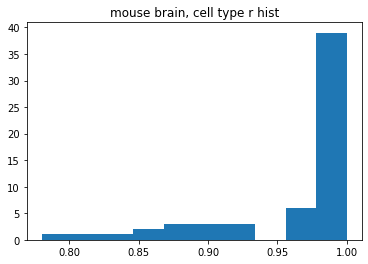

In [11]:
plt.hist(lols)
plt.title('mouse brain, cell type r hist')

In [12]:
keks = []
for i, j in zip(ln_hardcoded.obs[ln_hardcoded.uns['mod']['factor_names']].values.T, ln_regression.obs[ln_hardcoded.uns['mod']['factor_names']].values.T):
    keks.append(np.corrcoef(i, j)[0, 1])

Text(0.5, 1.0, 'lymph node, cell type r hist')

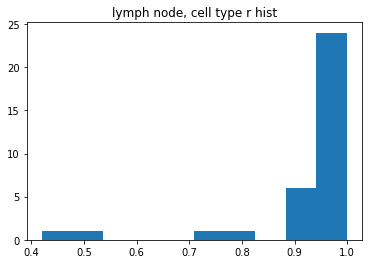

In [13]:
plt.hist(keks)
plt.title('lymph node, cell type r hist')

In [14]:
df_keks = pd.DataFrame(np.array(keks)[None, :].T, columns=['Pearson r'], index=ln_hardcoded.uns['mod']['factor_names']).sort_values('Pearson r', ascending=False)
df_lols = pd.DataFrame(np.array(lols)[None, :].T, columns=['Pearson r'], index=brain_hardcoded.uns['mod']['factor_names']).sort_values('Pearson r', ascending=False)

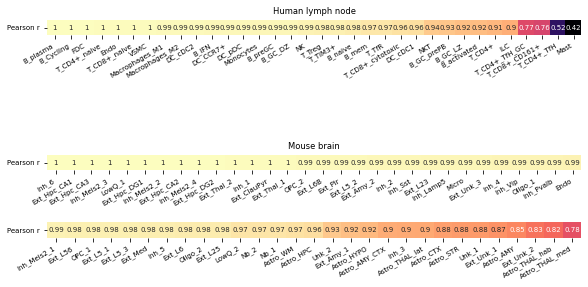

In [20]:
import seaborn as sns
from matplotlib.colors import Normalize


with mpl.rc_context({'font.size': 7}):
    plt.figure(figsize=(8.2, 4.))
    norm = Normalize(vmin=min(keks), vmax=1)

    plt.subplot(4, 1, 1)
    sns.heatmap(df_keks.T, cmap='magma', annot=True, cbar=False, norm=norm)
    plt.xticks(rotation=30, horizontalalignment='right');
    plt.yticks(rotation=0, horizontalalignment='right');
    plt.title('Human lymph node')


    plt.subplot(4, 1, 3)
    sns.heatmap(df_lols[:30].T, cmap='magma', annot=True, cbar=False, norm=norm)
    plt.xticks(rotation=30, horizontalalignment='right');
    plt.yticks(rotation=0, horizontalalignment='right');
    plt.title('Mouse brain')

    plt.subplot(4, 1, 4)
    sns.heatmap(df_lols[30:].T, cmap='magma', annot=True, cbar=False, norm=norm)
    plt.xticks(rotation=30, horizontalalignment='right');
    plt.yticks(rotation=0, horizontalalignment='right');

    plt.gcf().subplots_adjust(hspace=2, wspace=1)
    plt.tight_layout()
    plt.savefig(f'{fig_path}FigS23A_NB_regression_Pearson.pdf',
                bbox_inches='tight', facecolor='white', dpi=300)

In [27]:
df_lols

,Pearson r
Inh_6,0.999824
Ext_Hpc_CA1,0.999752
Ext_Hpc_CA3,0.999677
Inh_Meis2_3,0.999533
LowQ_1,0.999228
Ext_Hpc_DG1,0.999214
Inh_Meis2_2,0.999133
Ext_Hpc_CA2,0.999130
Inh_Meis2_4,0.998768
Ext_Hpc_DG2,0.997763


In [21]:
fig_path

'/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/lymph_nodes_analysis/pyro_model/signatures_lr0002_Adam_long_v0ref_30kiter_c2l/plots/figures/'

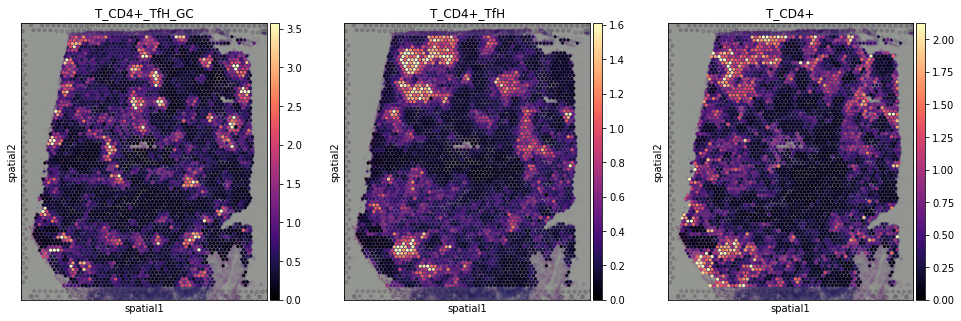

In [24]:
# plot in spatial coordinates for all cell types
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    # select one slide
    sc.pl.spatial(ln_regression, cmap='magma',
                  color=['T_CD4+_TfH_GC', 'T_CD4+_TfH', 'T_CD4+'], 
                  ncols=4, size=1.3, 
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2', save='FigS23C_NB_regression_NB.pdf')

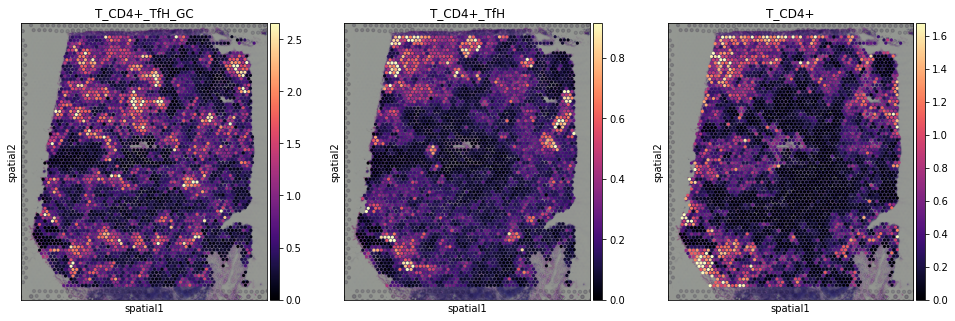

In [25]:
# plot in spatial coordinates for all cell types
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    # select one slide
    sc.pl.spatial(ln_hardcoded, cmap='magma',
                  color=['T_CD4+_TfH_GC', 'T_CD4+_TfH', 'T_CD4+'], 
                  ncols=4, size=1.3, 
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2', save='FigS23C_NB_regression_hardcoded.pdf')

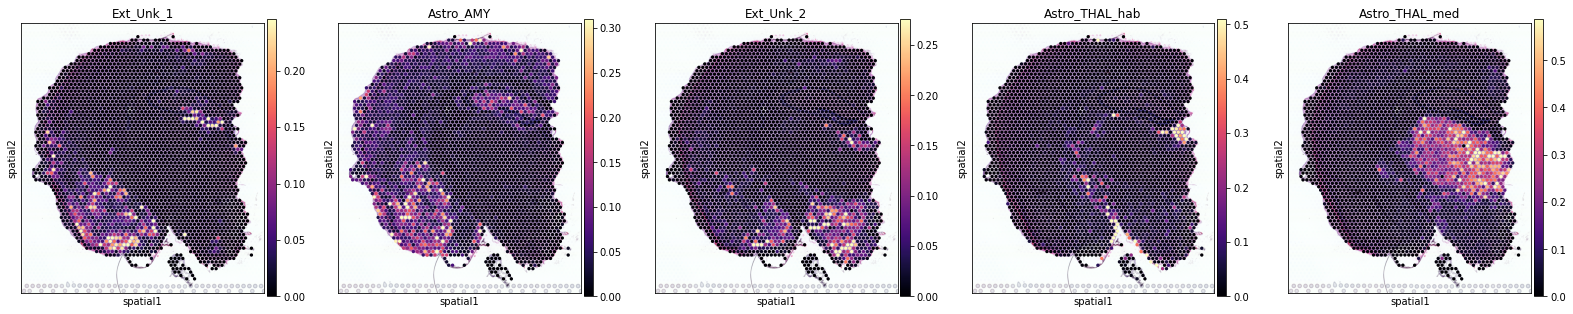

In [30]:
# plot in spatial coordinates for all cell types
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    # select one slide
    sc.pl.spatial(brain_regression, cmap='magma',
                  color=['Ext_Unk_1','Astro_AMY', 'Ext_Unk_2', 'Astro_THAL_hab', 'Astro_THAL_med'], 
                  ncols=5, size=1.3, 
                  img_key='hires', library_id='spaceranger100_count_30458_ST8059048_mm10-3_0_0_premrna',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2', save='FigS23C_brain_NB_regression_NB.pdf')

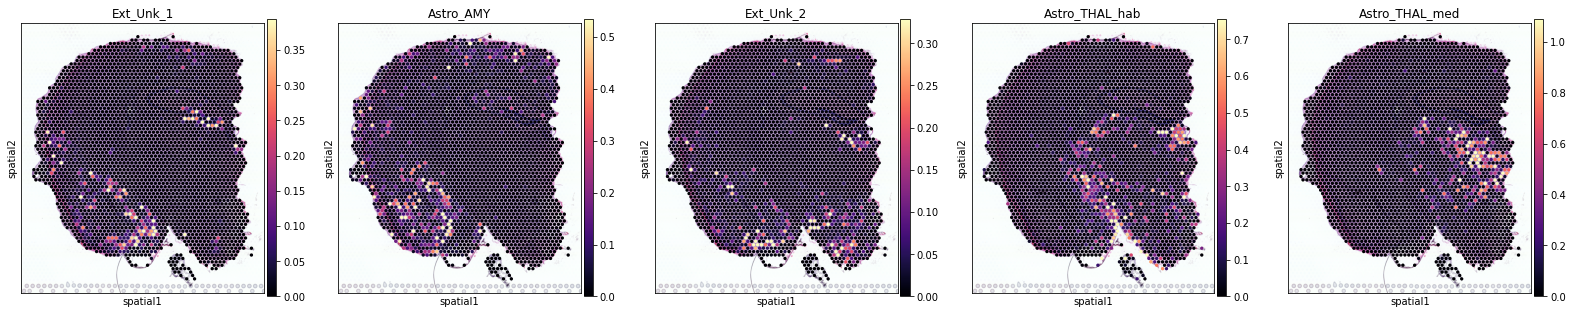

In [32]:
# plot in spatial coordinates for all cell types
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    # select one slide
    sc.pl.spatial(brain_hardcoded, cmap='magma',
                  color=['Ext_Unk_1','Astro_AMY', 'Ext_Unk_2', 'Astro_THAL_hab', 'Astro_THAL_med'], 
                  ncols=5, size=1.3, 
                  img_key='hires', library_id='spaceranger100_count_30458_ST8059048_mm10-3_0_0_premrna',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2', save='FigS23C_brain_NB_regression_hardcoded.pdf')